<a href="https://colab.research.google.com/github/Vishwaak/Time-for-Machine/blob/master/Cloth_fashion_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torchvision import datasets , transforms



In [0]:
# importing th data


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

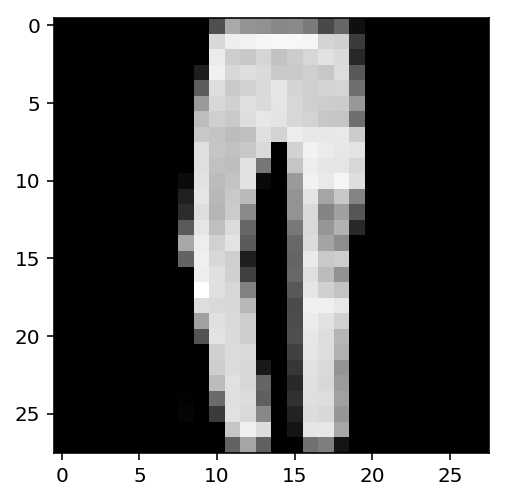

In [19]:
image, label = next(iter(trainloader))
plt.imshow(image[2,:].numpy().squeeze() , cmap = 'Greys_r');

In [20]:
print(image.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
import torch.nn as nn

In [0]:
model = nn.Sequential(nn.Linear(784 , 128),
                      nn.ReLU(),
                      nn.Linear(128 , 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim = 1)
                     
                     )
critc = nn.NLLLoss()
image = image.view(image.shape[0] , -1)

logitics = model(image)

loss = critc(logitics , label)

In [23]:
print(loss)

tensor(2.3230, grad_fn=<NllLossBackward>)


In [24]:
print(model[0].weight.grad)
loss.backward()
print(model[0].weight.grad)

None
tensor([[-2.3839e-03, -2.3839e-03, -2.3839e-03,  ..., -2.3839e-03,
         -2.3839e-03, -2.3839e-03],
        [-4.1608e-04, -4.1608e-04, -4.1608e-04,  ..., -4.1608e-04,
         -4.1608e-04, -4.1608e-04],
        [ 8.0406e-04,  8.0202e-04,  8.0127e-04,  ...,  8.0202e-04,
          8.0406e-04,  8.0406e-04],
        ...,
        [-3.4231e-05, -3.7009e-05, -3.8738e-05,  ..., -3.7009e-05,
         -3.4231e-05, -3.4231e-05],
        [-6.7397e-04, -6.7355e-04, -6.7101e-04,  ..., -6.8304e-04,
         -6.7397e-04, -6.7397e-04],
        [ 1.3016e-03,  1.3016e-03,  1.3016e-03,  ...,  1.3016e-03,
          1.3016e-03,  1.3016e-03]])


In [0]:
from torch import optim

optimizer = optim.SGD(model.parameters() , lr=0.01)

In [26]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = critc(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0143,  0.0206,  0.0083,  ..., -0.0072,  0.0351,  0.0256],
        [ 0.0252, -0.0222,  0.0128,  ..., -0.0106, -0.0203, -0.0153],
        [ 0.0326, -0.0075,  0.0314,  ...,  0.0229, -0.0155,  0.0319],
        ...,
        [-0.0266, -0.0051,  0.0132,  ...,  0.0244,  0.0290,  0.0043],
        [ 0.0338,  0.0198,  0.0240,  ..., -0.0232, -0.0001, -0.0285],
        [-0.0197,  0.0301, -0.0042,  ..., -0.0173, -0.0052, -0.0223]],
       requires_grad=True)
Gradient - tensor([[-0.0045, -0.0045, -0.0045,  ..., -0.0048, -0.0046, -0.0045],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0005, -0.0008, -0.0009],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        ...,
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0023,  0.0023,  0.0024],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0004,  0.0009,  0.0010],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0004,  0.0004,  0.0006]])


TypeError: ignored

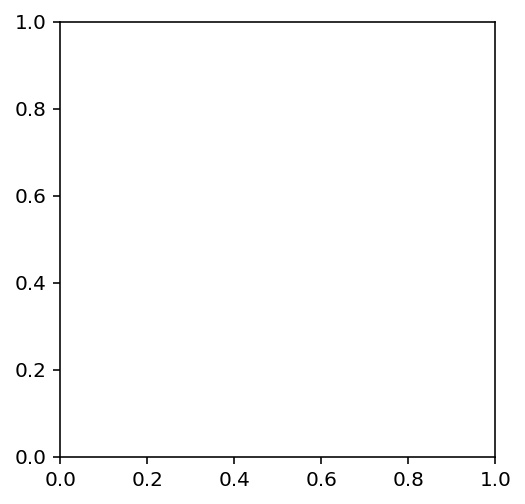

In [30]:
image, label = next(iter(trainloader))
plt.imshow(image[0]);